In [1]:
import portfolio as prt
import numpy as np
import matplotlib.pyplot as plt
import portfolio as prt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
quotes, returns = prt.load_data()

In [2]:
data,returns = prt.load_data()
start = '1/2/2015' 
init_port = {'MSFT':5000,'F':950,'CRAY':2000,'VZ':2000,'AAPL':3000,'IBM':1500,'NVDA':1001}
portfolio=[]
for x in data.columns:
    if x in init_port:
        portfolio.append(init_port[x])
    else:
        portfolio.append(0)
portfolio = np.array(portfolio)         

In [3]:
def get_data(t,T,start,data):
    period = pd.date_range(start, periods=T, freq='BMs',format='%Y-%m-%d')
    data = data.loc[:period[t]] 
    returns = data.shift(1)/data-1
    Q = np.array(prt.cov(returns))
    mu = np.array(returns.mean())
    p = data[-1:]
    return Q,mu,p.values,np.array(returns)

In [4]:
def update_cash_account(w,p,V,share_balance):
    w[w<0.001]=0
    new_balance = np.array(w*V/p)
    new_balance[new_balance<1]=0
    new_balance =np.array([np.round(x) for x in new_balance])
    transactions = -1*(new_balance-share_balance)
    return float(np.dot(transactions,p.T)),new_balance

In [5]:
def backtest_port(method,data,init_port,portfolio,dt=2,rf=0.0001,T=24):
    V_0 = [data.loc[start][x]*init_port[x] for x in init_port]
    rf = 0.0001
    dt=2
    cash_account = 0
    portfolio_return = np.empty([1,3])

    share_balance = portfolio
    w = share_balance/sum(V_0)

    period = data.index[data.index.is_month_start]
    for t in np.arange(2,24,dt):

        Q,mu,p,ret = get_data(t,24,start,data)
        V = np.sum(p*share_balance) + cash_account*(1+rf)**t
        port = prt.portfolio(Q,mu,p,V)
        port.calculate_performance(w,ret)

        w = port.select_by(method,ret)
        add_cash_account,share_balance = update_cash_account(w,p,V,share_balance)
        cash_account += add_cash_account
        portfolio_return = np.vstack([portfolio_return,[port.performance,cash_account,V/1e6]])

    
    plt.plot(portfolio_return[:,0])
    plt.figure()
    plt.plot(portfolio_return[:,1])

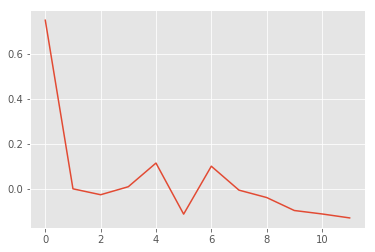

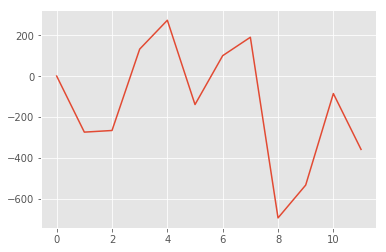

In [6]:
backtest_port('minVar',data,init_port,portfolio,dt=2,rf=0.0001,T=24)


In [7]:
share_balance

NameError: name 'share_balance' is not defined

In [ ]:
data,returns = prt.load_data()
mu = returns.mean()
Q = prt.cov(returns)
port = prt.portfolio(Q,mu)
plt.rcParams.update(plt.rcParamsDefault)
inline_rc = dict(plt.rcParams)
port.plot()

In [ ]:
np.vstack([np.ones(Q.shape[0]),np.ones(Q.shape[0])])

In [ ]:
V_0 = [data.loc[start][x]*init_port[x] for x in init_port]
rf = 0.0001
dt=24
cash_account = 0
portfolio_return = np.empty([1,3])

share_balance = portfolio
w = np.ones([portfolio.shape[0]])*(1/portfolio.shape[0])

period = data.index[data.index.is_month_start]
for t in np.arange(2,24,dt):
    
    Q,mu,p,ret = get_data(t,24,start,data)
    V = np.sum(p*share_balance) + cash_account*(1+rf)**t
    port = prt.portfolio(Q,mu)
    port.calculate_performance(w,ret)
    
    w = port.select_by('equalW',ret)
    cash_account += update_cash_account(w,p,V)
    portfolio_return = np.vstack([portfolio_return,[port.performance,cash_account,V/1e6]])


In [ ]:
plt.plot(portfolio_return[:,0])

In [ ]:
portfolio_return